# ДЗ 8. Снижение размерности данных

## Модель классификации на датасете IRIS

Обучить любую модель классификации на датасете IRIS до применения PCA (2 компоненты) и после него. Сравнить качество классификации по отложенной выборке.

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
def e_metrics(x1, x2):
    distance = np.sum(np.square(x1 - x2))
    return np.sqrt(distance)

In [3]:
def knn(x_train, y_train, x_test, k):
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [4]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [20]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [6]:
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y)

In [8]:
k = 10

y_pred_train = knn(X_train, y_train, X_train, k)
y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность на train при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность на test при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность на train при k = 10: 0.964
Точность на test при k = 10: 0.974


In [9]:
# Обработаем при помощи PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [10]:
# Разделим выборку
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(
    X_pca, y, test_size=0.25, random_state=1, stratify=y)

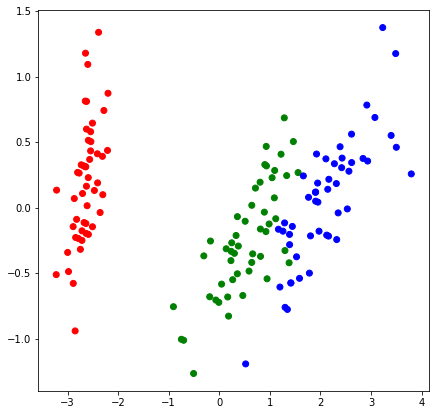

In [11]:
# Визуализируем выборку
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap);

In [12]:
# после PCA
y_pca_train_pred = knn(X_pca_train, y_pca_train, X_pca_train, k)
y_pca_pred = knn(X_pca_train, y_pca_train, X_pca_test, k)

print(f'Точность на train при k = {k}: {accuracy(y_pca_train_pred, y_pca_train):.3f}')
print(f'Точность на test при k = {k}: {accuracy(y_pca_pred, y_pca_test):.3f}')

Точность на train при k = 10: 0.964
Точность на test при k = 10: 0.974


(105083, 2)


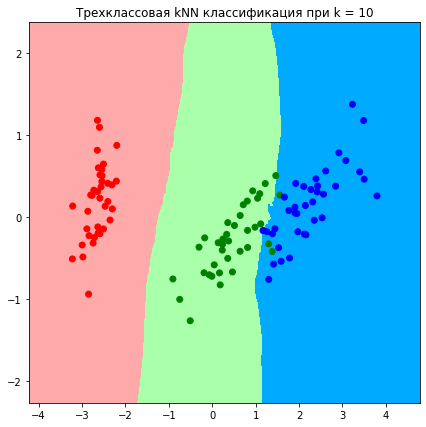

In [21]:
get_graph(X_pca_train, y_pca_train, k)

Вывод: Применение PCA практически не влияет на качество модели.

## * Реализация метода главных компонент

Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()